Regression Models

In [1]:
import pandas as pd #import pandas library
import numpy as np #import numpy library
import matplotlib.pyplot as plt #import Matplotlib library's "pyplot"
import seaborn as sns  #import Seaborn library

from sklearn import metrics #import metrics module from the Scikit-learn library
from sklearn.metrics import r2_score #import r2_score function from the metrics module in Scikit-learn 
from sklearn.metrics import explained_variance_score #import explained_variance_score function from the metrics module in Scikit-learn
import os #import the os module (interact with operating system)

#load data into a Pandas DataFrame
data = pd.read_csv("Volumetric_features.csv") #read the contents of CSV
data.head() #display the first few rows of "data"

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1


In [2]:
X = data.iloc[:, 2:139] #select a subset of columns "data" and assigns it to a new variable "X"
y = data['Age'] #select a single column ('Age') from "data" and assigns it to a new variable "y"

In [3]:
#split testing and training data
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ExtraTrees

In [4]:
#implement the model
from sklearn.ensemble import ExtraTreesRegressor

ext = ExtraTreesRegressor(n_estimators=300, random_state=42) #300 decision trees and a fixed random seed for reproducibility
ext.fit(X_train, y_train) #train model using the training set
y_pred = ext.predict(X_test) #predict on the testing set based on the model

The R square value is: 0.8828830833323474
The mean square error is: 48.036811084843706
The explained variance is: 0.8829137060383945


Text(0, 0.5, 'Y Predicted Data')

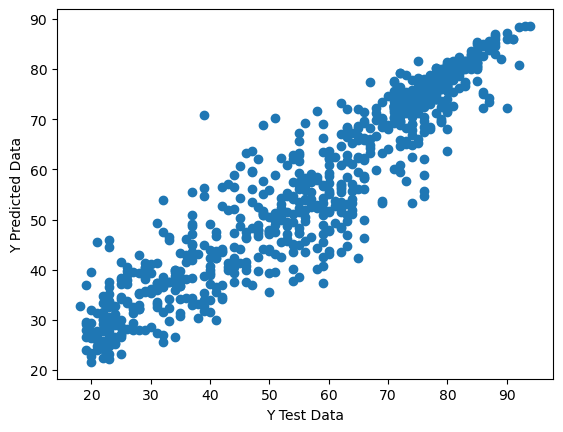

In [5]:
#evaluate the model
print('The R square value is:', metrics.r2_score(y_test, y_pred))
print('The mean square error is:', metrics.mean_squared_error(y_test, y_pred))
print('The explained variance is:', metrics.explained_variance_score(y_test, y_pred))

#generate a scatter plot (Y test vs Y predicted)
fig, ax = plt.subplots()
plt.scatter(y_test, y_pred, marker = 'o');
ax.set_xlabel('Y Test Data')
ax.set_ylabel('Y Predicted Data')

Partial Least Squares (PLS)

In [6]:
#implement the model
from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression(n_components=40) #PLS regression model with 40 components
pls.fit(X_train, y_train) #train model using the training set
y_pred = pls.predict(X_test) #predict on the testing set based on the model

The R square value is: 0.8543546713222304
The mean square error is: 59.738057815659374
The explained variance is: 0.8543577248280485


Text(0, 0.5, 'Y Predicted Data')

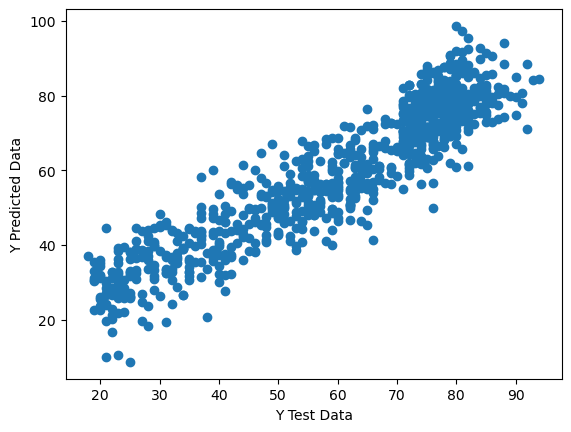

In [7]:
#evaluate the model

print('The R square value is:', metrics.r2_score(y_test, y_pred))
print('The mean square error is:', metrics.mean_squared_error(y_test, y_pred))
print('The explained variance is:', metrics.explained_variance_score(y_test, y_pred))

#generate a scatter plot (Y test vs Y predicted)
fig, ax = plt.subplots()
plt.scatter(y_test, y_pred, marker = 'o');
ax.set_xlabel('Y Test Data')
ax.set_ylabel('Y Predicted Data')